Name: Prashant Timalsina

Student ID: 2329486

Module Leader: Mr. Simon Giri

Tutor: Mr. Basudeo Shrestha

#Mounting the Drive

Accessing the drive storage and contents

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Importing most of libraries, Basic as well as some skicit-learn modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # data test-train split
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Accuracy, Classification report and confusion matrix
from sklearn.model_selection import RandomizedSearchCV #Randomised Search Cross Validation
from sklearn.feature_selection import SelectKBest, chi2 # feature selection for categorical target variables
import timeit

# Data Loading

Reading CSV file

In [3]:
df= pd.read_csv("/content/apple_quality.csv")

Viewing the data

In [4]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [5]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [6]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


Check nulls

In [7]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

-- Drop null becaouse count is just one

In [8]:
df.dropna(inplace=True)

-- After drop checking dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


* A feature to notice here is that in the dataframe, acidity is float d-type but here, it is represented as object so will have to convert before preprocessing

Checking the target variable distribution

In [10]:
quality_value = df['Quality'].value_counts()
quality_value

good    2004
bad     1996
Name: Quality, dtype: int64

# Exploratory Data Analysis

> Transpose view of decribe table such that the statistics are column and the features are rows

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


 The Data is be viewed to be normally distributed in description. For better analysis, the data is visualised as such:

* Visual representation with each column diffentiates the dependent variable on each of other variables.

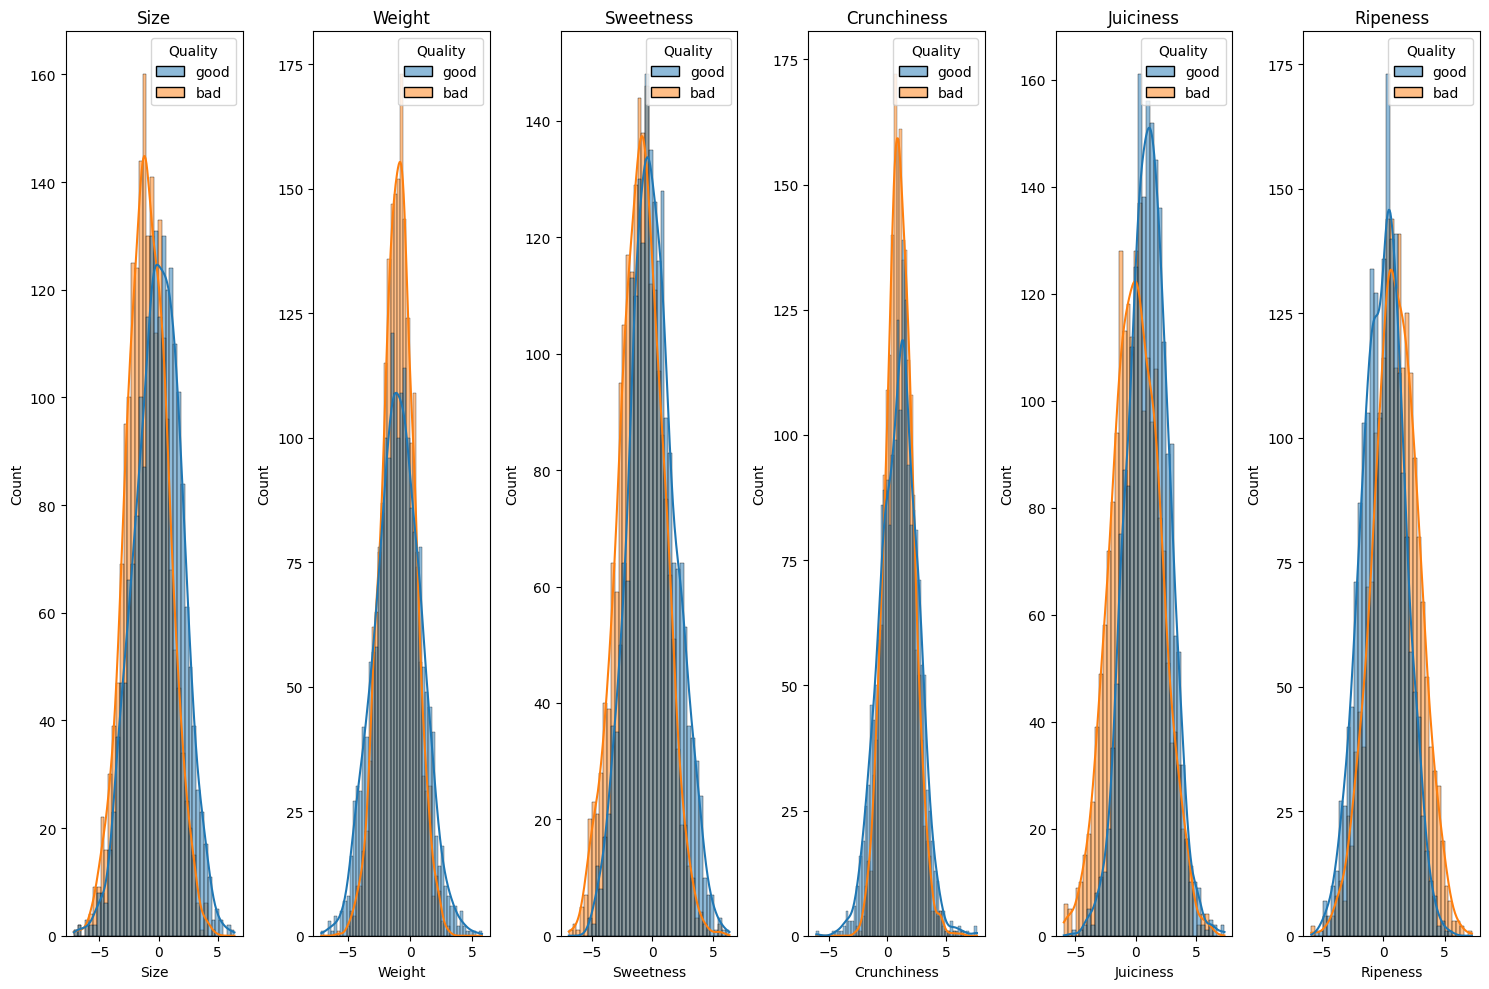

In [12]:
cols = [ 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness']
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(15, 10))

for i, col in enumerate(cols):
    sns.histplot(x=col, data=df, kde=True, hue='Quality', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

* Correlation of the various gradient of colors
> *Indexed at the side*

<ipython-input-13-df0784b701bd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,:8].corr(),annot=True, cmap="Accent")


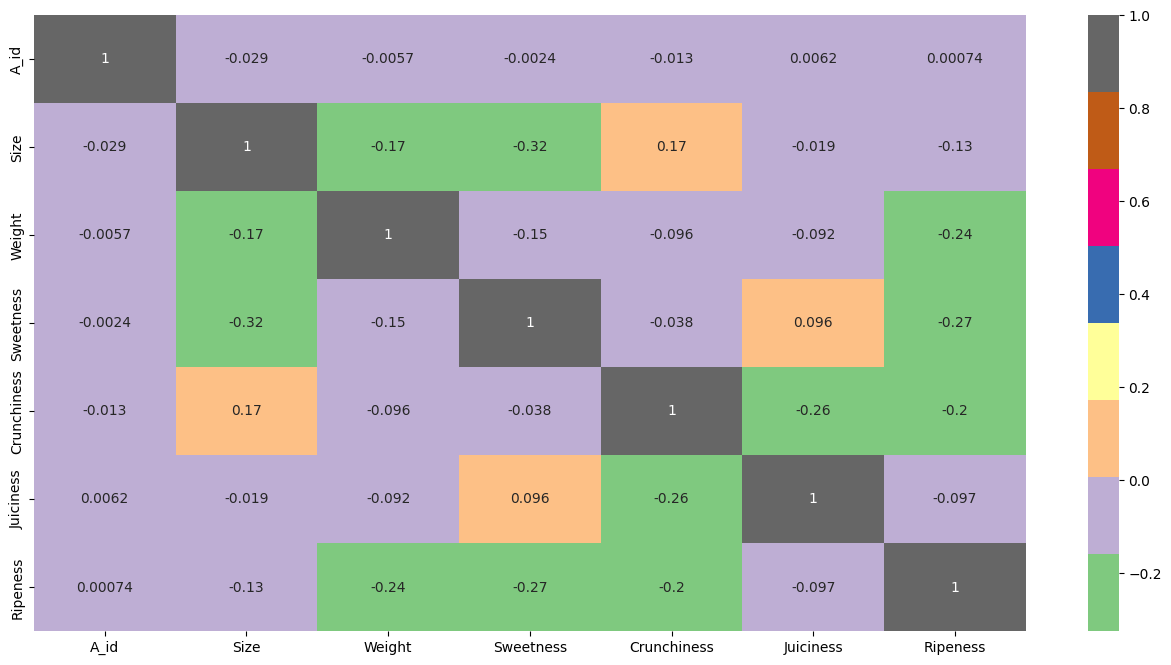

In [13]:
#Checking for correlation between input features:
plt.figure(figsize=(16,8))
sns.heatmap(df.iloc[:,:8].corr(),annot=True, cmap="Accent")
plt.show()

* The data seems equally same count because the difference is just of 12 counts.

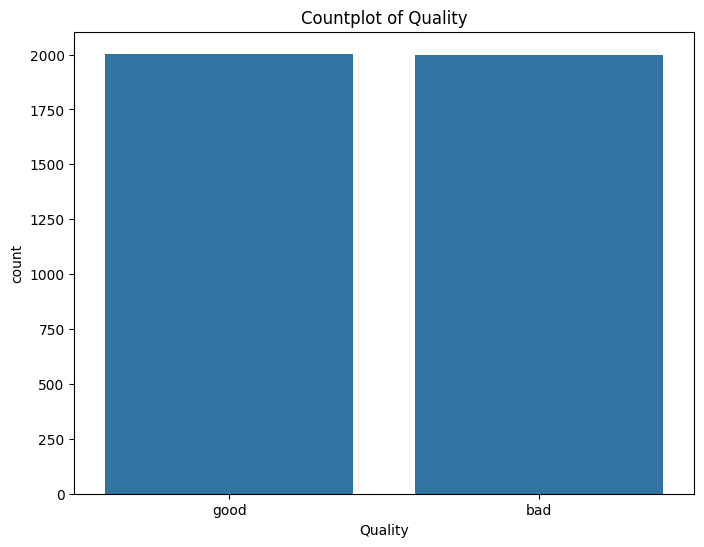

In [14]:
# Create countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=df)
plt.title('Countplot of Quality')
plt.show()

# Data Pre processing

* Acidity is a float d-type data so it is converted to float data type
* Transformed quality to a binary data for easier classifications (train and test purposes).

In [15]:
df['Acidity'] = df['Acidity'].astype(float)
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})

* Dependent variable is quality
* Independent variables are remaining variables
> A_id is a sequential data that has no basis of data impact.

In [16]:
X = df.drop(['Quality', 'A_id'], axis = 1)
y = df['Quality']

* Train Test Data Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

>Data Standardization for a pre testing purpose to scale the features and normalize the data.
Fitting data scales train and test data accordingly such that mean and variance are close to 0 and 1 respectively.

>Use of gradient based methods like support Vectors of XGB models are sensitive to data and requires proper pre processing.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Your Models
* Classification(Logistic Regression,Voting Classifier)
> * Model definition and implementation
> * Accuracy, Confusion Matrix and Classification Report
* Hyper parameter turning and Cross Validation(RandomizedSearchCV)
> * Min max Scaling
> * Hyperparameter tuning for CV
> * CV implementation for 5-fold CV
> * Best parameter and model selection , prediction and testing.
* Feature selection method(SelectKBest with chi-squared Test)
> * Feature selection and training.
> * Display features

# Logistic Regression

* Skicit-Learn Method
>* Regression Model
> * Accuracy Calculation
> * Confusion Matrix
> * Classification Report

In [19]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model on the training set
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.74125
Confusion Matrix:
 [[283 116]
 [ 91 310]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73       399
           1       0.73      0.77      0.75       401

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



> Hyper Parameters tuning for Randomized Search CV
* Min Max scaler scaling to avoid negative values

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression model
logreg_model = LogisticRegression()

# Define hyperparameter grid for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(
    logreg_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42
)

random_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_
print("Best Parameters:", best_params)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print("\nEvaluation Results:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# SelectKBest using chi-squared test
k_best = SelectKBest(chi2, k=5)
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

# Print the selected feature indices
selected_feature_indices = np.where(k_best.get_support())[0]
print("\nSelected Feature Indices:", selected_feature_indices)

# Print the corresponding feature names
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Feature Names:", selected_feature_names)

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1438.44988828766}

Evaluation Results:
Accuracy: 0.7425
Confusion Matrix:
 [[284 115]
 [ 91 310]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73       399
           1       0.73      0.77      0.75       401

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800


Selected Feature Indices: [0 2 3 4 5]
Selected Feature Names: Index(['Size', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness'], dtype='object')


Hyper Parameters CV modelling had little to no impact in accuracy of model's predictive ability

# Higher Modelling (Voting Classifier)

> Voting Classifier is a concept of a single, robust model that is a assemble of multiple models and the final outcome predicted is by the majority weight of predictions by the models accompiled.

Here there are 5 classifiers assembled being
* Logistic Regression:
> Predicts the probability of the instances and utilizes probability distribution of binary dependent variables
* Support Vector Classifier
>separates data into different classes and finding margins between classes and define decision boundaries
* KNeighbour Classifier
> instance based approach and non parametric because it assigns class label based on majority class of its k-nearest neighbours
* Random Forest Classifier
> reduces overfitting by combining predictions from multiple decisions tree and merge them to provide a accurate and stable prediction
* XGB classifier( Gradient boosting algorithm )
> Builds a series of weak learners as of decision trees and combines them to create a strong predictive model



In [21]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier


scores = []

models = [
    LogisticRegression(),
    SVC(probability=True),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),

]

for model in models:
    model.fit(X_train, y_train)

    y_pred_proba = model.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred_proba)

    scores.append(acc_score)

print("Baseline Models and Their Scores")
print("")
models = ['LogisticRegression', 'SVM', 'KNN', 'RandomForest', 'XGBoost']
iter1 = pd.DataFrame(data={"Model": pd.Series(models),
                            'Accuracy': pd.Series(scores)})

print(iter1)

Baseline Models and Their Scores

                Model  Accuracy
0  LogisticRegression   0.74250
1                 SVM   0.86750
2                 KNN   0.87875
3        RandomForest   0.88250
4             XGBoost   0.87375


Higher Voting count goes to Random Forest and XGBoost classifier. The Best feature about voting classifier is the selection allowed to choose a better model from multiple choices.

In [22]:
# Voting Classifier of RF and XGB
weights = [0.8,1,1]

rf = RandomForestClassifier()
xgb = XGBClassifier()

voting_clf = VotingClassifier(estimators=[ ('rf', rf), ('xgb', xgb)], voting='soft')
voting_clf.fit(X_train, y_train)

y_pred_proba = voting_clf.predict(X_test)

acc_voting = accuracy_score(y_test, y_pred_proba)

print(f"Voting Classifier Score: {acc_voting}")

Voting Classifier Score: 0.8825


* Validating the classified predicted results to test results

In [23]:
y_pred = voting_clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       399
           1       0.87      0.90      0.88       401

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



* Confusion matrix to view the predicted and real value case scenario

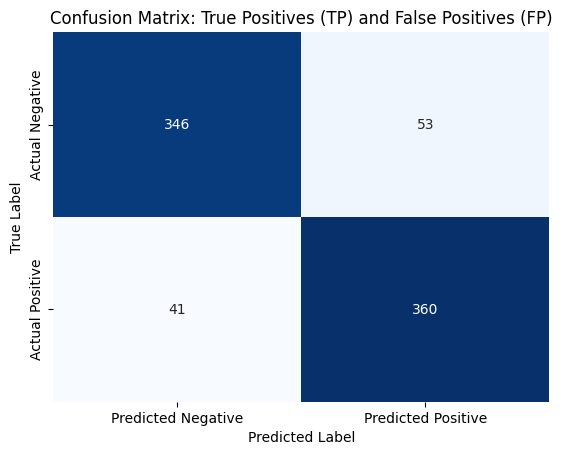

In [24]:
y_pred = voting_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: True Positives (TP) and False Positives (FP)')
plt.show()

> Hyper Parameters and Cross Validation
* Using Randomized Search Cross Validation on the voting classifier model.

In [25]:
# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection using SelectKBest with chi-squared test
k_best = SelectKBest(chi2, k=5)  # Select top 5 features based on chi-squared test
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)


# Get the selected features
selected_feature_indices = np.where(k_best.get_support())[0]
selected_feature_names = X.columns[selected_feature_indices]

# Train on the selected features
best_model.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = best_model.predict(X_test_selected)

# Evaluate the model
accuracy_selected = accuracy_score(y_test, y_pred)

print("Accuracy with Selected Features:", accuracy_selected)
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_feature_names)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Accuracy with Selected Features: 0.82875
Selected Feature Indices: [0 2 3 4 5]
Selected Feature Names: Index(['Size', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness'], dtype='object')


The hyper parameter tuned cross validation decreased the accuracy of prediction by some value.

1. What was your model performance in before?
> The models performed very well with accuracies ranging from 70s to 80s
2. Did any of the methods you applied {Cross Validation and Feature selection} increased or decreased.
>The model either had no impact or negative impact with the cross Validation and feature selections.
3. What did you learn and what could be the future direction?
> The dataset seems to do better with the RandomForestClassifier meaning with the collection of decision trees to analyse the data further invoked.